<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n250_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n250.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,55.520235,70.781195,55.064556,-0.054509,191.311477,191.353483,-0.042007
1,0.0,1.0,49.633248,31.808392,89.943005,0.134488,181.519134,181.385074,0.134060
2,0.0,2.0,79.051543,86.882070,86.242875,0.086888,262.263377,262.221342,0.042035
3,0.0,3.0,32.810280,68.486692,41.625341,-0.050173,152.872141,152.874634,-0.002494
4,0.0,4.0,85.777397,28.543795,67.874953,-0.602517,191.593627,192.209705,-0.616079
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,73.858673,38.595120,58.321323,-0.257472,180.517644,180.760724,-0.243079
249996,999.0,246.0,89.759600,89.326499,98.704931,0.156461,287.947491,287.795589,0.151902
249997,999.0,247.0,20.756026,33.971366,62.009625,0.025921,126.762938,126.736918,0.026020
249998,999.0,248.0,25.214799,76.248143,59.392842,0.222465,171.078248,170.878799,0.199448


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    55.520235  70.781195  55.064556 -0.054509  191.311477   
      1.0    49.633248  31.808392  89.943005  0.134488  181.519134   
      2.0    79.051543  86.882070  86.242875  0.086888  262.263377   
      3.0    32.810280  68.486692  41.625341 -0.050173  152.872141   
      4.0    85.777397  28.543795  67.874953 -0.602517  191.593627   
...                ...        ...        ...       ...         ...   
999.0 245.0  73.858673  38.595120  58.321323 -0.257472  180.517644   
      246.0  89.759600  89.326499  98.704931  0.156461  287.947491   
      247.0  20.756026  33.971366  62.009625  0.025921  126.762938   
      248.0  25.214799  76.248143  59.392842  0.222465  171.078248   
      249.0  26.942382  48.174964  66.909055 -0.129282  151.897119   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    191.353483 -0.042007  
      1.0    181.385074  0.134060  
      2.0    262.221342  0.042035  
      3.0    152.874634 -0.002494  
      4.0    192.209705 -0.616079  
...                 ...       ...  
999.0 245.0  180.760724 -0.243079  
      246.0  287.795589  0.151902  
      247.0  126.736918  0.026020  
      248.0  170.878799  0.199448  
      249.0  152.031824 -0.134705  

[250000 rows x 7 columns]

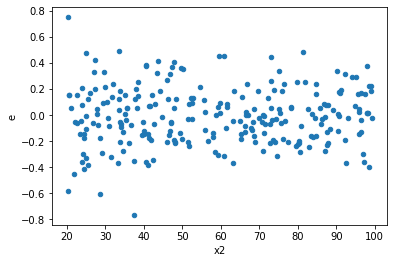

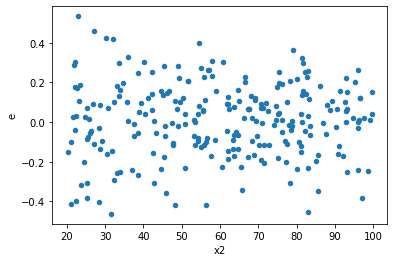

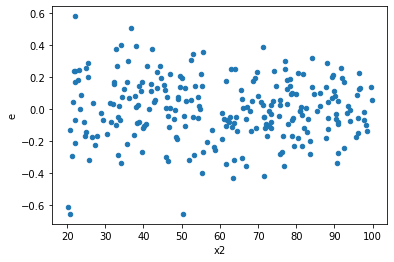

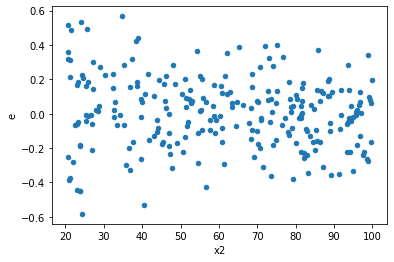

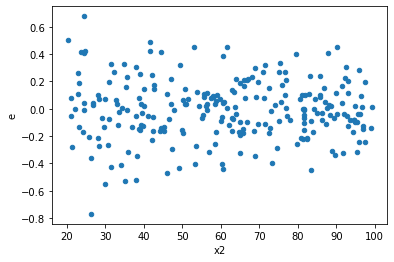

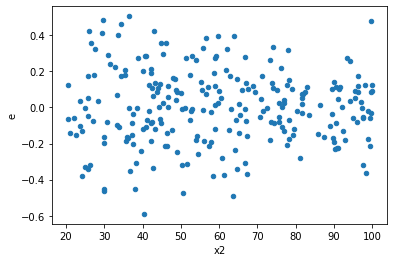

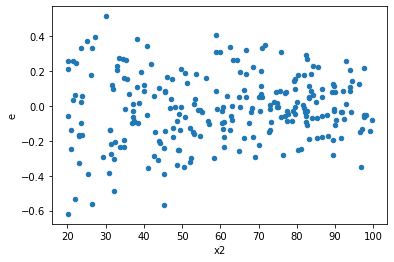

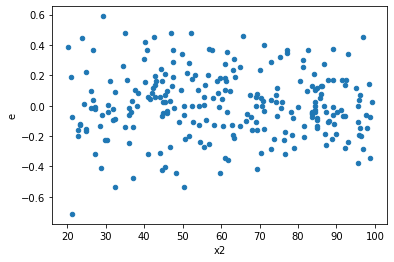

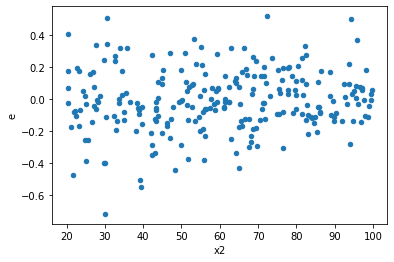

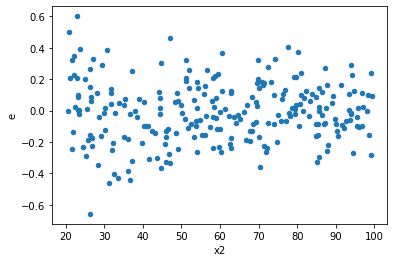

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,116.0,128.0,4.38931519892406,5.081316568317253,0.03783892412865569,0.03969778568997854,1.0491256451954751,0.7894261449873512,0.6052869275063244,0.3947130724936756,Reject005=1 : Homoscedasticity
3.0,110.0,134.0,3.958810925364824,6.261734886749371,0.03598919023058931,0.046729364826487846,1.2984277925422683,0.14918502263014055,0.9254074886849297,0.07459251131507028,Reject005=1 : Homoscedasticity
4.0,133.0,111.0,4.990734967854437,6.733618755803928,0.037524323066574716,0.06066323203426962,1.6166376120001533,0.009317658827558972,0.9953411705862205,0.004658829413779486,Reject005=0 : Heteroscedasticity
5.0,114.0,130.0,4.086957494467494,6.373755667812786,0.035850504337434155,0.049028889752406046,1.367592748233987,0.08399090593401715,0.9580045470329914,0.04199545296700857,Reject005=1 : Homoscedasticity
7.0,157.0,87.0,7.114779606763578,4.304518661363482,0.04531706755900368,0.0494772259926837,1.0918011393447604,0.6573541807215426,0.6713229096392287,0.3286770903607713,Reject005=1 : Homoscedasticity
9.0,134.0,110.0,3.5140539182941946,5.482138984382415,0.026224282972344734,0.049837627130749226,1.9004381238299766,0.0005588108548879589,0.999720594572556,0.00027940542744397945,Reject005=0 : Heteroscedasticity
10.0,140.0,104.0,4.70810449295656,5.809183703915264,0.03362931780683257,0.055857535614569846,1.660977363127512,0.006745615299605268,0.9966271923501974,0.003372807649802634,Reject005=0 : Heteroscedasticity
17.0,136.0,108.0,5.331536374123256,4.957037022838103,0.039202473339141584,0.045898490952204656,1.1708059987729766,0.39347041558978546,0.8032647922051073,0.19673520779489273,Reject005=1 : Homoscedasticity
23.0,123.0,121.0,4.291068782001165,6.7001848667985096,0.034886738065050125,0.05537342865122735,1.5872343395354864,0.011312508793423603,0.9943437456032882,0.005656254396711802,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,109.0,135.0,5.4548103578321365,6.142245011898824,0.05004413172323061,0.04549811119925055,0.9091597682397237,0.6069544326765098,Reject005=1 : Homoscedasticity
1.0,106.0,138.0,4.469223761354692,3.877285256090027,0.0421624883146669,0.02809626997166686,0.6663807354532517,0.02903262116582804,Reject005=0 : Heteroscedasticity
2.0,116.0,128.0,4.38931519892406,5.081316568317253,0.03783892412865569,0.03969778568997854,1.0491256451954751,0.7894261449873512,Reject005=1 : Homoscedasticity
3.0,110.0,134.0,3.958810925364824,6.261734886749371,0.03598919023058931,0.046729364826487846,1.2984277925422683,0.14918502263014055,Reject005=1 : Homoscedasticity
4.0,133.0,111.0,4.990734967854437,6.733618755803928,0.037524323066574716,0.06066323203426962,1.6166376120001533,0.009317658827558972,Reject005=0 : Heteroscedasticity
5.0,114.0,130.0,4.086957494467494,6.373755667812786,0.035850504337434155,0.049028889752406046,1.367592748233987,0.08399090593401715,Reject005=1 : Homoscedasticity
6.0,114.0,130.0,5.393002754537686,3.367061717623237,0.047307041706470924,0.025900474750947977,0.5474972396636918,0.0011005974523899534,Reject005=0 : Heteroscedasticity
7.0,157.0,87.0,7.114779606763578,4.304518661363482,0.04531706755900368,0.0494772259926837,1.0918011393447604,0.6573541807215426,Reject005=1 : Homoscedasticity
8.0,116.0,128.0,4.453901481315841,4.288702523294868,0.038395702425136555,0.033505488463241154,0.8726364240521377,0.45576381836192315,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      549
Reject005=0 : Heteroscedasticity    451
Name: Result_test, dtype: int64